In [2]:
using PyPlot
using AlfvenDetectors
using DelimitedFiles

┌ Info: Recompiling stale cache file /home/vit/.julia/compiled/v1.1/AlfvenDetectors/VqnlF.ji for AlfvenDetectors [5e555b46-3391-11e9-1beb-e9498a8cd634]
└ @ Base loading.jl:1184


In [2]:
datapath = "/home/vit/vyzkum/alfven/cdb_data/uprobe_data/"

"/home/vit/vyzkum/alfven/cdb_data/uprobe_data/"

In [3]:
files = readdir(datapath);
length(files)

1028

In [468]:
patchsize = 128
outpath = "/home/vit/.julia/environments/v1.1/dev/AlfvenDetectors/experiments/conv/data/"
outfile = joinpath(outpath,"labeled_patches.csv")
labelarray = Array{Any,2}(["shot" "tstart" "fstart" "label"])

1×4 Array{Any,2}:
 "shot"  "label"  "tstart"  "fstart"

In [471]:
data,header=readdlm(outfile,',',header=true)

([10000.0 1.023 1.3e6 1.0; 10000.0 1.02953 1.2e6 1.0; … ; 10418.0 1.20069 625000.0 0.0; 10418.0 1.20725 625000.0 0.0], AbstractString["shot" "tstart" "fstart" "label"])

### If there are some saved labels already, load them into the label array

In [14]:
labelarray = readdlm(outfile,',')

112×4 Array{Any,2}:
      "shot"   "label"        "tstart"   "fstart"
 10000.0      1.023          1.3e6      1.0      
 10000.0      1.02953        1.2e6      1.0      
 10000.0      1.03608        1.2e6      1.0      
 10000.0      1.03608        1.6e6      1.0      
 10000.0      1.04919        1.2e6      1.0      
 10000.0      1.05575        1.5e6      1.0      
 10000.0      1.06235        1.4e6      1.0      
 10001.0      1.02           1.2e6      1.0      
 10001.0      1.02651        1.2e6      1.0      
 10001.0      1.03306        1.2e6      1.0      
 10001.0      1.04617        1.3e6      1.0      
 10001.0      1.03962        1.3e6      1.0      
     ⋮                                           
 10889.0      1.04776   900000.0        1.0      
 10889.0      1.05431   900000.0        1.0      
 10889.0      1.06087   700000.0        1.0      
 10889.0      1.06742   700000.0        1.0      
 10892.0      1.011          1.2e6      1.0      
 10892.0      1.03066        1

### First show the full shot

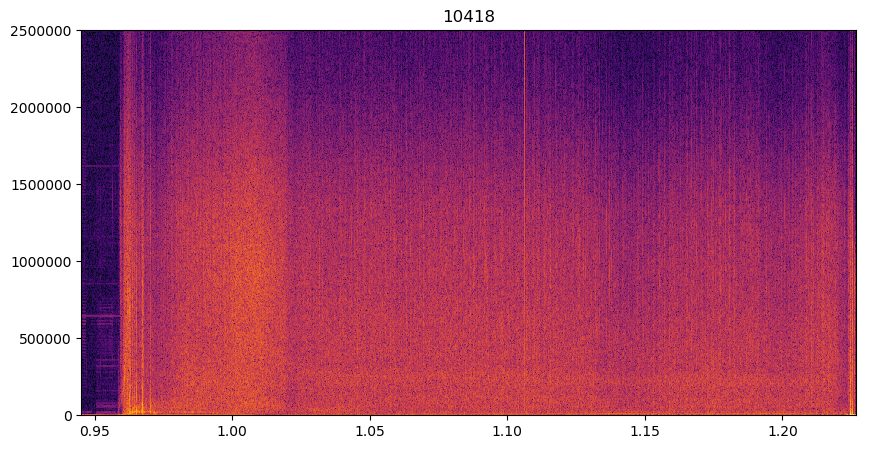

PyObject <matplotlib.collections.QuadMesh object at 0x7f24dd5b69b0>

In [375]:
shotno = 10000 + 418
file = joinpath(datapath, filter(x->occursin("$shotno", x), files)[1])
data = AlfvenDetectors.get_signal(file, AlfvenDetectors.readnormlogupsd);
t = AlfvenDetectors.get_signal(file, AlfvenDetectors.readtupsd);
f = AlfvenDetectors.readfupsd(file);
size(data)
cmap = "inferno"
figure(figsize=(10,5))
title(shotno)
pcolormesh(t,f,data,cmap=cmap)

### Then cut just the chirp data

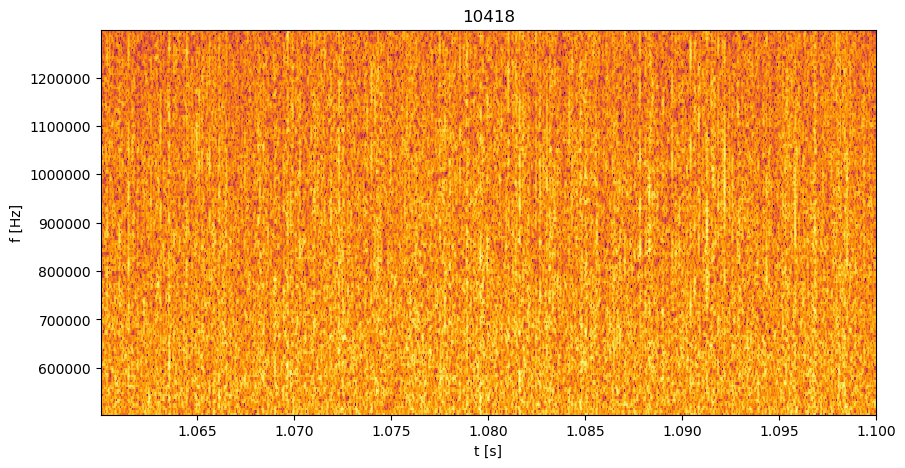

PyObject Text(24.0, 0.5, 'f [Hz]')

In [376]:
figure(figsize=(10,5))
title(shotno)
ylim = [500000,1300000]
xlim = [1.06, 1.1]
yinds = ylim[1] .< f .< ylim[2]
xinds = xlim[1] .< t .< xlim[2]
pcolormesh(t[xinds],f[yinds],data[yinds,xinds],cmap=cmap)
xlabel("t [s]")
ylabel("f [Hz]")

### Finally, cut the individual patches

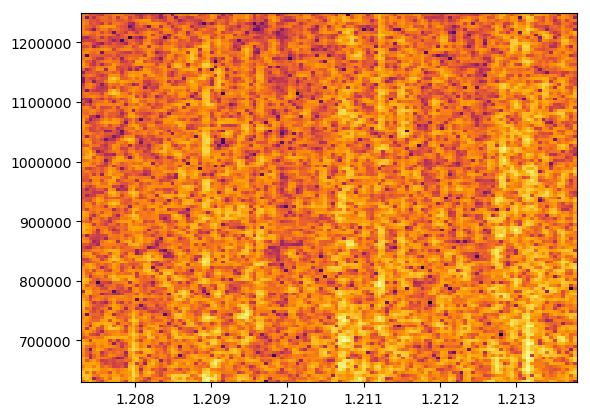

0

In [458]:
#fstart = fpatch[end]
tstart = tpatch[end]
#fstart = minimum(f)
#tstart = minimum(t)
tinds = tstart .< t
finds = fstart .< f
tpatch = t[tinds][1:patchsize]
fpatch = f[finds][1:patchsize]
patch = data[finds,tinds][1:patchsize,1:patchsize]
pcolormesh(tpatch, fpatch, patch,cmap=cmap)
label = 0

In [459]:
labelarray = vcat(labelarray, [shotnotstart fstart label])

303×4 Array{Any,2}:
      "shot"   "label"        "tstart"   "fstart"
 10000.0      1.023          1.3e6      1.0      
 10000.0      1.02953        1.2e6      1.0      
 10000.0      1.03608        1.2e6      1.0      
 10000.0      1.03608        1.6e6      1.0      
 10000.0      1.04919        1.2e6      1.0      
 10000.0      1.05575        1.5e6      1.0      
 10000.0      1.06235        1.4e6      1.0      
 10001.0      1.02           1.2e6      1.0      
 10001.0      1.02651        1.2e6      1.0      
 10001.0      1.03306        1.2e6      1.0      
 10001.0      1.04617        1.3e6      1.0      
 10001.0      1.03962        1.3e6      1.0      
     ⋮                                           
 10418.0      1.13516   625000.0        0.0      
 10418.0      1.14171   625000.0        0.0      
 10418.0      1.14826   625000.0        0.0      
 10418.0      1.15482   625000.0        0.0      
 10418.0      1.16137   625000.0        0.0      
 10418.0      1.16792   625000

In [460]:
savearray = deepcopy(labelarray)

303×4 Array{Any,2}:
      "shot"   "label"        "tstart"   "fstart"
 10000.0      1.023          1.3e6      1.0      
 10000.0      1.02953        1.2e6      1.0      
 10000.0      1.03608        1.2e6      1.0      
 10000.0      1.03608        1.6e6      1.0      
 10000.0      1.04919        1.2e6      1.0      
 10000.0      1.05575        1.5e6      1.0      
 10000.0      1.06235        1.4e6      1.0      
 10001.0      1.02           1.2e6      1.0      
 10001.0      1.02651        1.2e6      1.0      
 10001.0      1.03306        1.2e6      1.0      
 10001.0      1.04617        1.3e6      1.0      
 10001.0      1.03962        1.3e6      1.0      
     ⋮                                           
 10418.0      1.13516   625000.0        0.0      
 10418.0      1.14171   625000.0        0.0      
 10418.0      1.14826   625000.0        0.0      
 10418.0      1.15482   625000.0        0.0      
 10418.0      1.16137   625000.0        0.0      
 10418.0      1.16792   625000

In [461]:
writedlm(outfile, savearray, ",")

In [466]:
readdir(joinpath(dirname(pathof(AlfvenDetectors)), "../experiments/conv/data"))

2-element Array{String,1}:
 "labeled_shots.csv" 
 "labels_128x128.csv"